In [ ]:
#https://www.kaggle.com/datasets/lottoexpecter/big-data-certification-study?select=vote.csv

#1. 분류

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame


#1-1. 데이터 불러오기
data = pd.read_csv('breast-cancer-wisconsin.csv', encoding='utf-8')


#1-2. X,Y 나누기
X = data[data.columns[1:10]]
y = data[["class"]]


#1-3. train-test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
  #print(y_train.mean()) 
  #print(y_test.mean())
   #stratify=y는 훈련과 테스트 데이터 분류시 정상/환자 데이터 비율을 치우치지 않고 맞게 하라는 것. 
   #radom_state=42는 분석할 때마다 다른 결과가 나오는 것을 막기 위해, 동일하게 훈련,테스트 데이터 나누어지게 함.


#2-1. 데이터 전처리: 데이터 정규화 
#일반적으로 머신,딥러닝에선 minmax 더 선호.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

scaler_minmax.fit(X_train)  
  #fit는 train에만 함. train 데이터 기준(최대/최솟값 등)을 적용한다는 뜻.
X_scaled_minmax_train = scaler_minmax.transform(X_train)  
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

X_scaled_minmax_test = scaler_minmax.transform(X_test)  
X_scaled_standard_test = scaler_standard.transform(X_test)
  #test는 fit과정 필요없음



#3-1. 모델학습: 로지스틱 회귀모델
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()   #이름이 길어서 model로 정의
model.fit(X_scaled_minmax_train, y_train)  #모델 훈련


#4-1. 모델평가: 정확도
pred_train = model.predict(X_scaled_minmax_train)  #모델 예측(범주)
model.score(X_scaled_minmax_train, y_train)  #모델 정확도
pred_test = model.predict(X_scaled_minmax_test)  #모델 예측(범주)
model.score(X_scaled_minmax_test, y_test)  #모델 정확도

#4-1. 모델평가: 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train) #혼동행렬
confusion_test = confusion_matrix(y_test, pred_test)

from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train) #정확도, 정밀도, 재현율, f1-score
cfreport_test = classification_report(y_test, pred_test)

#4-1. 모델평가: ROC 지표
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test)) 

import matplotlib.pyplot as plt
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC =%0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.show()


#5. 예측값 병합 및 저장
prob_train = model.predict_proba(X_scaled_minmax_train)
y_train[['y_pred']] = pred_train
y_train[['y_prob0', 'y_prob1']] = prob_train

prob_test = model.predict_proba(X_scaled_minmax_test)
y_test[['y_pred']] = pred_test
y_test[['y_prob0', 'y_prob1']] = prob_test

Total_test = pd.concat([X_test, y_test], axis=1)
Total_test.to_csv("classfication_test.csv")

#2. 회귀

In [ ]:
#1-1. 불러오기
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
data = pd.read_csv('house_price.csv', encoding='utf-8')
#data.hist(bins=500, figsize=(15,10))


#1-2. x,y 나누기
X = data[data.columns[0:5]]
y = data[["house_value"]]


#1-3. train-validity-test로 3단계 분할하기
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=1)  #train, test로 나눔
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, random_state=2)  #train을 train, valid로 나눔
#print(y_train.mean())
#print(y_test.mean())


#2-1. 정규화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)
#pd.DataFrame(X_scaled_minmax_train).describe()
#pd.DataFrame(X_scaled_standard_train).describe()

X_scaled_minmax_test = scaler_minmax.transform(X_test)
X_scaled_standard_test = scaler_standard.transform(X_test)


#3-1. 모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

#4-1. 모델평가: 정확도
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)


#4-1. 모델평가: RMSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred_test)
np.sqrt(MSE)   #오차는 61,763정도 있음.

#4-1. 모델평가: MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_test)

#4-1. 모델평가: MAPE
def MAPE(y_test, pred_test):
  return np.mean(np.abs((y_test - pred_test) / y_test)) * 100
MAPE(y_test, pred_test)

#4-1. 모델평가: MPE
def MPE(y_test, pred_test):
  return np.mean((y_test-pred_test)/y_test)*100
MPE(y_test, pred_test)

#4-1. 모델평가 cross_val_score : 랜덤 없는 교차검증. 데이터의 순서가 있는 그대로 그룹 나눠서 훈련
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)   #5번교차검증
#print("5개 테스트 셋 정확도: ", scores)
#print("정확도 평균:", scores.mean())

#4-2. 모델평가 K-Fold : 랜덤 있는 교차 검증.
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  #그룹수 5개
score = cross_val_score(model, X_train, y_train, cv=kfold)
#print("5개 폴드의 정확도: ", score)

#4-3. 모델평가 임의분할 교차검증
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, random_state=42)
score = cross_val_score(model, X_train, y_train, cv=shuffle_split)
#print("교차검증 정확도:", score)


#5. 예측값 병합 및 저장
y_train[['y_pred']] = pred_train
y_test[['y_pred']] = pred_test
Total_test = pd.concat([X_test, y_test], axis=1)
Total_test.to_csv("regression_test.csv")

#----------------------------------------------------------
#<머신러닝 프로세스>

#2-2. 범주변수 변환
- 원핫인코딩: 해당되면 1, 아니면 0으로 입력하는 방식.

In [ ]:
#1-1. 데이터 불러오기
import pandas as pd
data = pd.read_csv('vote.csv', encoding='utf-8')

#1-2. x,y 나누기
X = data[data.columns[0:2]]
y = data[data.columns[3:]]
X['gender'] = X['gender'].replace([1,2], ['male', 'female'])
X['region'] = X['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheung', 'Honam', 'Youngnam', 'Others'])


#2-2. 데이터 범주변수 변환 - 원핫인코딩: 해당되면 1, 아니면 0으로 입력하는 방식.
X_dum = pd.get_dummies(X)


#5. 예측값 병합 및 저장
Fvote = pd.concat([X_dum, y], axis=1)
Fvote.to_csv('Fvote.csv', index=False, sep=',', encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


#3-1. 모델 훈련과 세부 튜닝
1) 그리드 탐색

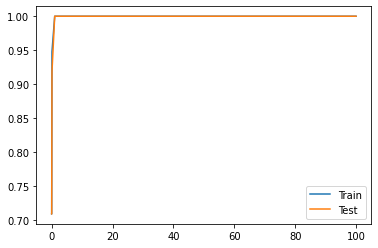

In [ ]:
#1-1. 데이터 불러오기
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
data = pd.read_csv('Fvote.csv', encoding='utf-8')

#1-2. x,y 나누기
X = data[data.columns[1:13]]
y = data[['vote']]

#1-3. train-test 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


#3-2. 그리드탐색: 분석자가 하이퍼파라미터 특정값 지정, 각각 모델 적용해 모델적 합도를 비교하는 방법.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  #6개의 모델 결과 제시
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

#print("Best Parameter: {}".format(grid_search.best_params_))  #정확도 높은 하이퍼파라미터는?
#print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
#print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))
#result_grid = pd.DataFrame(grid_search.cv_results_)

import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

2) 랜덤 탐색

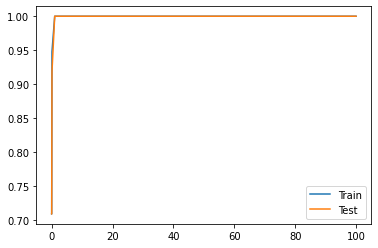

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression

param_distribs = {'C': randint(low=0.001, high=100)}
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

#print("Best Parameter: {}".format(random_search.best_params_))  #정확도 높은 하이퍼파라미터는?
#print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
#print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))
#result_random = random_search.cv_results_
#pd.DataFrame(result_random)

import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

-------------------------------------------------
#<알고리즘>

#1. 로지스틱 회귀모델 (회귀)
- 종속변수가 범주형.
- 원자료를 확률 → 오즈 → 로그로 변환한 선형회귀모델
- LogisticRegression의 주요하이퍼파라미터 'C=1'

In [ ]:
#1-1. 데이터 불러오기
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv("breast-cancer-wisconsin.csv", encoding='utf-8')
data.head()

#1-2. x,y값
X = data[data.columns[1:10]]
y = data[["Class"]]

#1-3. 훈련,검증데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#2-1. 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

#3-1. 모델 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled_train, y_train)

#4-1. 모델 평가
pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)   #정확도: 97.26%
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)   #정확도: 97.26%

#4-1. 모델평가 : 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
confusion_test = confusion_matrix(y_test, pred_test)
#print("훈련 데이터 오차 행렬: \n", confusion_train)
  #정상(0)중 5명이 오분류, 환자(1)중 9명이 오분류. 나머지는 실제와 예측이 일치.
#print("테스트 데이터 오차 행렬: \n", confusion_test)
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
#print("분류예측 레포트:\n", cfreport_train)  #정확도: 97%

#4-1. 모델평가 : Grid Search - C값을 조정해서 더 정확히 예측해보기
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)
#print(grid_search.best_params_)
#print(grid_search.best_score_)  #정확도 97%
#print(grid_search.score(X_scaled_test, y_test))

#4-1. 모델평가: Random Search - 무작위 추출
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {'C': randint(low=0.001, high=100)}
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distribs, n_iter=100, cv=5)
random_search.fit(X_scaled_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.score(X_scaled_test, y_test))

{'C': 13}
0.9745478774033887
0.9590643274853801


#2. 랜덤 포레스트
- 부트스트랩 통해 N개 샘플링 데이터셋 생성. 
- 데이터셋에서 임의 변수 선택. M개 변수 중에서 sqrt(M) 또는 M/3개. 
- 의사결정트리들을 종합해 앙상블 모델을 만들고 OOB error을 통해 오분류율 평가.

*n_estimators: 나무의 수 (디폴트: 100)
*max_features: 선택 변수(특성) 수 

1) 분류

In [ ]:
#3-1. 모델학습
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_scaled_train, y_train)

#4-1. 모델평가
pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)   #정확도: 100%
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)   #정확도: 100%


#4-1. 모델평가 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
confusion_test = confusion_matrix(y_test, pred_test)
#print(confusion_train)   #정확도: 100%
#print(confusion_test)    #정확도: 96~97%

from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
cfreport_test = classification_report(y_test, pred_test)
#print(cfreport_train)    #정확도: 100%
#print(cfreport_test)    #정확도: 97~98%


#4-1. Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = { 'n_estimators': range(100, 1000, 100),     #100에서 1000까지 100개씩 증가
               'max_features': ['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
#grid_search.fit(X_scaled_train, y_train)
#print(grid_search.best_params_)   #{'max_features': 'auto', 'n_estimators': 600}
#print(grid_search.best_score_)    #97%
#print(grid_search.score(X_scaled_test, y_test))

#4-1. Random Search
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {'n_estimators': randint(low=100, high=1000),
                  'max_features': ['auto', 'sqrt', 'log2']}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train, y_train)
#print(random_search.best_params_)   #{'max_features': 'auto', 'n_estimators': 705}
#print(random_search.best_score_)
#print(random_search.score(X_scaled_test, y_test))

{'max_features': 'auto', 'n_estimators': 705}
0.9745669141442985
0.9649122807017544


2) 회귀

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_scaled_train, y_train)

pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)   #정확도: 98%
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)     #정확도: 85%

#4-1. RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
#print(np.sqrt(MSE_train))
#print(np.sqrt(MSE_test))


#4-1. Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = { 'n_estimators': range(100, 1000, 100),     #100에서 1000까지 100개씩 증가
               'max_features': ['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)
print(grid_search.best_params_)   #{'max_features': 'auto', 'n_estimators': 100}
print(grid_search.best_score_)    #97%
print(grid_search.score(X_scaled_test, y_test))


{'max_features': 'auto', 'n_estimators': 100}
0.9745859508852085
0.9649122807017544


#<예제 문제>
- https://www.kaggle.com/code/lottoexpecter/python-2-department-store-customer-logistic-regr/data?select=y_train.csv 

1) 작업형 제1유형
- qsec컬럼을 최소최대척도로 변환한 후, 0.5보다 큰 값을 가지는 레코드 수 구하기


In [12]:
import pandas as pd
a = pd.read_csv('mtcars.csv', index_col=0)
#print(a)

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(a)
scaled = minmax.transform(a)
#print(pd.DataFrame(data=scaled))

qsec_scaled = scaled[:, 6]
#print(qsec_scaled)

b = qsec_scaled > 0.5
print(sum(b))

9


2) 작업형 제2유형
- X_train.csv, X_test.csv: 고객 상품구매 속성
- y_train.csv: 3,500명 고객의 성별 데이터
- 학습 데이터를 이용해 성별예측 모형을 만든 후, 평가데이터를 통해 예측값이 남자일 확률을 csv로 생성하시오. 성능은 ROC-AUC 평가.
- 데이터전처리, Feature Engineering, 분류 알고리즘, 초매개변수 최적화, 모형 앙상블 수반.
- 수험번호.csv로 코드 제출

In [39]:
import pandas as pd
X = pd.read_csv("X_train_2.csv")
y = pd.read_csv("y_train.csv")
test = pd.read_csv("X_test_2.csv")


  #숫자형 변수, 문자형 변수 나눠 담기.
X_num = X[['total_buy', 'max_buy', 'payback', 'days', 'buy_per_day', 'weekend_come', 'buy_period']]
  #결측치=0
X_num = X_num.fillna(0)  
X_cat = X[['main_product', 'where']]
  #원핫인코딩
X_cat = pd.get_dummies(X_cat)

test_num = test[['total_buy', 'max_buy', 'payback', 'days', 'buy_per_day', 'weekend_come', 'buy_period']]
test_num = test_num.fillna(0)
test_cat = test[['main_product', 'where']]
test_cat = pd.get_dummies(test_cat)

#★★★ X_cat와 test_cat의 하위범주 동일하게 맞춰주기. 교집합. 변수 수가 다르면 예측 불가.
X_cat, test_cat = X_cat.align(test_cat, join='inner', axis=1) 

#모델 정규화
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(X_num)
X_scaled = minmax.transform(X_num)
test_scaled = minmax.transform(test_num)

X_final = pd.concat([pd.DataFrame(X_scaled), X_cat], axis=1)
test_final = pd.concat([pd.DataFrame(test_scaled), test_cat], axis=1)

y = y['gender']



from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_final, y)  #적용

#test_final에 학습한 모델. 예측하고 확률 저장.
pred_test = model.predict_proba(test_final)  

#0: 여성, 1: 남성일 확률
pred_test_prob = pd.DataFrame(pred_test[:, 1], columns = ['gender'])


final_predict = pd.concat([test['cust_id'], pred_test_prob], axis=1)
print(final_predict)
final_predict.to_csv("20211204.csv", index=False)

      cust_id    gender
0        3500  0.545627
1        3501  0.156078
2        3502  0.205614
3        3503  0.354606
4        3504  0.432065
...       ...       ...
2477     5977  0.535992
2478     5978  0.562554
2479     5979  0.750804
2480     5980  0.472934
2481     5981  0.467446

[2482 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


#<작업유형1 예제 문제>

1) 제1유형
1-1) 
- crim(범죄율) 상위에서 10번째값으로 상위 10개의 값을 변환하고
- ge 80 이상인 값에 대하여 crim 평균을 구하시오.
- https://gomguard.tistory.com/37#google_vignette 

In [49]:
import pandas as pd
data = pd.read_csv("housing.csv")
data_sort = data.sort_values(by='CRIM', ascending=False)
#print(data_sort.head(12))

def recode(num):
  if num>=25.9406:
    return 25.9406
  else:
    return num

data_sort['RE_CRIM'] = data_sort['CRIM'].apply(recode)
#print(data_sort.head(20))

data_80 = data_sort[data_sort['AGE']>=80]
#print(data_80.head(50))

print(data_80['RE_CRIM'].mean())

5.759386625


1-2)
- 첫번째 행부터 80% 데이터를 훈련데이터로 추출 후,
- 'total_bedrooms' 결측값(NA)를 'total_bedrooms' 중앙값으로 대체
- 대체전의 'total_bedrooms' 변수 표준편차 값의 차이 절댓값
- https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [59]:
import pandas as pd
data = pd.read_csv('housing.csv')
#data.info()
data_80 = data[:16512]
data_80_fill = data_80.fillna(data_80.median())
#print(data_80_fill.isnull().sum())
pre_std = data_80['total_bedrooms'].std()
post_std = data_80_fill['total_bedrooms'].std()
print(abs(pre_std-post_std))

1.9751472916456692


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


1-3)
- charges 항목의 이상값의 합은
- 이상값은 평균에서 1.5표준편차 이상인 값.

In [69]:
import pandas as pd
data = pd.read_csv('insurance.csv')
ch_mean = data['charges'].mean()
ch_std = data['charges'].std()
#print(ch_mean, ch_std)
charge_out = data[(data['charges'] >= (ch_mean + ch_std * 1.5 )) | (data['charges'] <= (ch_mean - ch_std * 1.5 ))]

print(charge_out['charges'].sum())


6421430.0206699995


<작업유형2 예제문제>

1. 고객이 주문한 물품의 정시 도착 여부를 예측.

In [74]:
import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_test.csv")

x_num = x_train[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]
x_cat = x_train[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']]
x_cat = pd.get_dummies(x_cat)

test_num = x_test[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]
test_cat = x_test[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']]
test_cat = pd.get_dummies(test_cat)

x_cat, test_cat = x_cat.align(test_cat, join='inner', axis=1)

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(x_num)
x_scaled = minmax.transform(x_num)
test_scaled = minmax.transform(test_num)

x_final = pd.concat([pd.DataFrame(x_scaled), x_cat], axis=1)
test_final = pd.concat([pd.DataFrame(test_scaled), test_cat], axis=1)

y = y['Reached.on.Time_Y.N']

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_final, y)

pred_test = model.predict_proba(test_final)
pred_test_prob = pd.DataFrame(pred_test[:, 0], columns=['predict_prob'])

final_predict = pd.concat([test['ID'], pred_test_prob], axis=1)
print(final_predict)
final_predict.to_csv("1.csv", index=False)

ValueError: ignored

2-1) 결측값 전부 제거 후, 순서대로 70% 추출
변수 중 'tax'의 사분위수 Q1 값은?

In [89]:
import pandas as pd
data = pd.read_csv('boston.csv')

data_n = data.dropna()
#print(data_n.isnull().sum())

#data.info(): 506
data_70 = data_n.iloc[:int(len(data_n)*0.7)]
#data_70.info()

#data_70.head()
data_Q1 = data_70['TAX'].describe()['25%']
print(data_Q1)

264.0


2-2) 2000년도 전체 입국자 평균보다 국내에 많이 입국한 국가의 수는?

In [ ]:
import pandas as pd
data = pd.read_csv('tour.csv', index_col='year', encoding='euc-kr')

mean = data.loc[2000].mean()

print(sum(data.loc[2000, :]>mean))

2-3) 결측치 비율이 높은 변수명은?
https://www.kaggle.com/c/titanic/data?select=test.csv

In [94]:
import pandas as pd
data = pd.read_csv('titanic.csv')
print((data.isnull().sum()/len(data)).sort_values(ascending=False).index[0])

Cabin


제2유형
- 여행보험 상품가입 여부 예측

In [111]:
#1-1. 데이터 불러오기
import pandas as pd
test = pd.read_csv('test.csv')
data = pd.read_csv('train.csv')

#1-2. x,y 나누기
X = data[data.columns[1:9]]
y = data[['TravelInsurance']]

X_num = X[['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases']]
X_cat = X[['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']]
X_cat = pd.get_dummies(X_cat)

test_num = test[['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases']]
test_cat = test[['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']]
test_cat = pd.get_dummies(test_cat)

X_cat, test_cat = X_cat.align(test_cat, join='inner', axis=1)

#2-1. 정규화
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(X_num)
X_scaled = minmax.transform(X_num)
test_scaled = minmax.transform(test_num)

X_final = pd.concat([pd.DataFrame(X_scaled), X_cat], axis=1)
test_final = pd.concat([pd.DataFrame(test_scaled), test_cat], axis=1)

y = y['TravelInsurance']


#4. 모델학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_final, y)

pred_test = model.predict_proba(test_final)
pred_test_prob = pd.DataFrame(pred_test[:, 1], columns=['predict_prob'])
final_predict = pd.concat([test['Age'], pred_test_prob], axis=1)
final_predict.to_csv("2022.csv", index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
